The first step is to find reviewer ids that commonly occur together e.g. review the same hotels

In [108]:
# connect to the sqlite database
import sqlite3

def connect_db(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
    except Error as e:
        print(e)

    return conn

conn = connect_db("yelpResData.db")

In [150]:
import numpy as np
import random
np.random.seed(1)
conn.text_factory = lambda x: str(x, 'iso-8859-1')

# get one sample review to test the connection
def get_data(query):  
    cur = conn.cursor()
    # get all positives
    cur.execute(query)
    reviews = []
    rows = cur.fetchall()
    for row in rows:
        reviews.append(row)
    return reviews
#for row in rows:
#    print(row)
cur = conn.cursor()
cur.execute("SELECT * FROM review WHERE flagged LIKE 'Y' limit 1")
rows = cur.fetchall()

query_pos = "SELECT * FROM review WHERE flagged LIKE 'Y'" 
query_neg = "SELECT * FROM review WHERE flagged LIKE 'N'" 
# get review text
rows_pos = get_data(query_pos)
rows_neg = get_data(query_neg)

rows_neg = random.sample(rows_neg, len(rows_pos))




In [176]:
reviews = (rows_pos + rows_neg)
random.shuffle(reviews)

#reviews = list(reviews)
for i in range (0, len(reviews)):
    reviews[i] = list(reviews[i])
    reviews[i][3] = reviews[i][3].replace('Â\xa0', '')

In [259]:
reviews

[['12/26/2009',
  'ds',
  'Eexj_Cliz1j_nAdNwH0PCw',
  "This Diner stands head and shoulders above any place i've been to, I've never had a bad meal here. I'm pretty new to the whole meatless dining experience so the first time I went here I was expecting tepid tofu and limp lifeless legumes. Boy was I wrong, everything here just tastes so great- seitan, soy whatever it is that masquerades as meat it is really tasty. The waiters are really helpful and efficient, the diner is brightly lit with natural light that streams in from the large windows and leafy plants add the decoration. Grab a booth if you get a chance, they look like church pews and are hard to enter and exit from but provide surprising comfort and intimacy. As a reformed carnivore I can honestly say that the Diner is my favourite restaurant and encourage anyone to give it a try!",
  5,
  0,
  2,
  1,
  'N',
  'o54U2VkQama8FI30qDkWvw'],
 ['4/5/2008',
  'eDkdjhNTUzfrzO11qz3mzQ',
  '7GKxyJtjHivKfPVi2tT_9A',
  "My go-to place f

In [175]:
import csv

with open("YelpResReviews.csv", 'w') as file:
    wr = csv.writer(file, quoting=csv.QUOTE_ALL, delimiter=',')
    wr.writerow(["date","reviewID","reviewerID","reviewContent","rating","usefulCount","coolCount","funnyCount","flagged","restaurantID"])
    for i in range (0,len(reviews)):
        #for j in range (0,10):
        wr.writerow(reviews[i])
        #wr.writerow([x[j] for x in reviews[i]])

In [38]:
import json
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
from ibm_watson.natural_language_understanding_v1 import Features, CategoriesOptions, EmotionOptions, EntitiesOptions

authenticator = IAMAuthenticator('qK3W263cJ9IAmltdir-3IhfhEkb6Z5KyiDx-M9Jhm75P')
natural_language_understanding = NaturalLanguageUnderstandingV1(
    version='2020-08-01',
    authenticator=authenticator
)

natural_language_understanding.set_service_url('https://api.au-syd.natural-language-understanding.watson.cloud.ibm.com/instances/49a00c0c-2c73-4ca1-bb57-b762514264e0')

response = natural_language_understanding.analyze(
    text=reviews[0],
    features=Features(
        entities=EntitiesOptions(emotion=True, limit=2)
    )).get_result()

print(json.dumps(response, indent=2))

DecodeError: It is required that you pass in a value for the "algorithms" argument when calling decode().

In [95]:
from senticnet.senticnet import SenticNet
sn = SenticNet()
concept_info = sn.concept('love')
polarity_label = sn.polarity_label('love')
polarity_value = sn.polarity_value('love')
moodtags = sn.moodtags('love')
semantics = sn.semantics('love')
sentics = sn.sentics('love')

In [96]:
sentics

{'introspection': '0.897',
 'temper': '0',
 'attitude': '0',
 'sensitivity': '0.762'}

In [97]:
semantics

['desire_succeed', 'excitement', 'lust', 'passion', 'sexuality']

In [98]:
polarity_label

'positive'

In [99]:
polarity_value

'0.83'

In [244]:
reviews[8]

['7/7/2009',
 'grYfF_W86T_UtvQQPtKo_A',
 'pNpotuRUy_2HbRubh6M4zw',
 'these burgers are unbelievable. try the hell burger if you like spicy foods they put them on pretzel buns which makes them even better. Interior is cool and they have a outdoor patio. What more can you ask for?',
 5,
 0,
 0,
 0,
 'Y',
 '6gZTET0y7ARZMrbJRmI2mw']

In [243]:
from sentic import SenticPhrase
text = "you are not ugly, don't worry"
sp = SenticPhrase(text)
sp.info(text)

{'sentics': {'pleasantness': -0.87,
  'attention': 0.0,
  'sensitivity': 0.936,
  'aptitude': -0.98},
 'moodtags': {'#anger': 1, '#disgust': 1},
 'sentiment': 'strong negative',
 'polarity': -0.93,
 'semantics': {'embarrassment', 'nervousness', 'panic', 'shame', 'upset'}}

In [102]:
#sp.get_sentics()

#sp.get_moodtags()

sp.get_sentiment()

#sp.get_polarity()


'strong negative'

In [219]:
import pandas as pd

df = pd.read_csv("LIWC2015 Results (YelpResReviews.csv).csv")
#df.columns = map(str.lower, df.columns)
df = df.drop(columns=["F","G","H"])
df.rename(columns={'A': 'date', 'B': 'reviewID', 'C':'reviewerID', 'D': 'review', 'E': 'rating', 'I': 'flagged','J': 'restaurantID'}, inplace=True)
#(["date","reviewID","reviewerID","reviewContent","rating","usefulCount","coolCount","funnyCount","flagged","restaurantID"])


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16606 entries, 0 to 16605
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          16606 non-null  object 
 1   reviewID      16606 non-null  object 
 2   reviewerID    16606 non-null  object 
 3   review        16604 non-null  object 
 4   rating        16606 non-null  int64  
 5   flagged       16606 non-null  object 
 6   restaurantID  16606 non-null  object 
 7   WC            16606 non-null  int64  
 8   Analytic      16606 non-null  float64
 9   Clout         16606 non-null  float64
 10  Authentic     16606 non-null  float64
 11  Tone          16606 non-null  float64
 12  WPS           16606 non-null  float64
 13  Sixltr        16606 non-null  float64
 14  pronoun       16606 non-null  float64
 15  ppron         16606 non-null  float64
 16  i             16606 non-null  float64
 17  we            16606 non-null  float64
 18  you           16606 non-nu

In [330]:
# drop behavioural columns and highly correlated ones e.g. pronoun, which includes ipron etc.
#df_reg = df.drop(columns=["date","reviewID","reviewerID","review","rating","restaurantID","pronoun","i", "we", "you", "shehe", "they"])
#df_reg
df_reg = df[['Authentic', 'Tone','Clout','Analytic','flagged','WC']]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_reg["flagged"] = le.fit_transform(df_reg["flagged"])


/Users/jamesfyfe/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [331]:
#le.inverse_transform([1]) # Y = 1, N = 0

In [332]:
df_reg

,Authentic,Tone,Clout,Analytic,flagged,WC
0,67.81,77.29,85.29,70.81,0,143
1,8.65,97.19,55.09,90.53,1,78
2,43.37,84.54,47.33,70.69,0,150
3,55.94,48.14,54.13,30.03,1,580
4,4.50,75.85,50.00,70.25,0,37
...,...,...,...,...,...,...
16601,7.12,99.00,83.54,3.52,1,41
16602,51.18,86.75,47.98,55.56,0,595
16603,35.37,35.71,41.03,56.25,1,176
16604,54.77,38.75,65.32,66.80,0,686


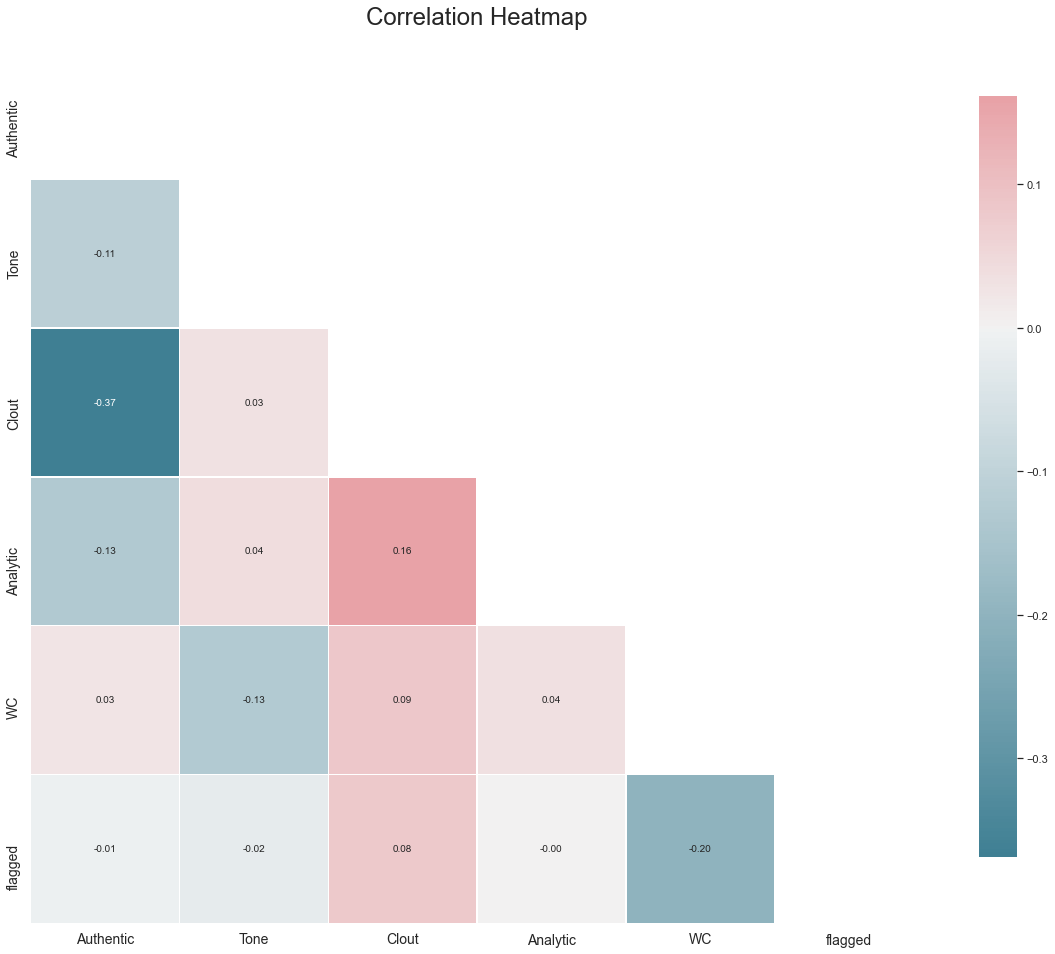

In [333]:
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap(df_fs):
    sns.set(style="white")
    # Calculating Pearson's correlation coefficient of the subsetted data
    correlation = (pd.concat([df_fs.drop(columns=["flagged"]),df_fs["flagged"]], axis=1)).corr()
    mask = np.zeros_like(correlation, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(20,20))
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(correlation, center=0, mask=mask,cmap=cmap,
                fmt='.2f', square=True, linewidths=.5, 
                annot=True, cbar_kws={"shrink": .70},  
                annot_kws={"size": 10})
    ax.set_title('Correlation Heatmap', fontsize = 24)
    ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 14)
    ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 14)

    
heatmap(df_reg)

In [334]:
# linguistic only
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = df_reg.drop(columns=["flagged"])
Y = df_reg["flagged"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=True)
clf = LogisticRegression(random_state=1).fit(X_train, Y_train)
clf.predict(X_test)
clf.score(X_test, Y_test)


0.6201083684527393

In [335]:
le.inverse_transform([0])

array(['N'], dtype=object)

In [255]:
from sklearn.linear_model import LogisticRegression
#X, y = load_iris(return_X_y=True)
log = LogisticRegression(penalty='l1', solver='liblinear')
log.fit(X_train, Y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [256]:
log.score(X_test, Y_test)

0.6351595424443106

In [257]:
# emotion deviation


In [286]:
df_emotion_and_LIWC = pd.read_csv("LIWC_and_emotions.csv")
pos = (df_emotion_and_LIWC[df_emotion_and_LIWC["flagged"]=="Y"])
neg= (df_emotion_and_LIWC[df_emotion_and_LIWC["flagged"]=="N"])
df_neg_only = neg.sample(n=len(pos))

df_emotion = pd.concat([df_neg_only, pos])


In [312]:
df_reg_emotion = df_emotion.drop(columns=["date","reviewID","reviewerID","review","rating","restaurantID","pronoun","i", "we", "you", "shehe", "they"])
le_emotion = preprocessing.LabelEncoder()
df_reg_emotion["flagged"] = le_emotion.fit_transform(df_reg_emotion["flagged"])

X = df_reg_emotion.drop(columns=["flagged"])
Y = df_reg_emotion["flagged"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1, shuffle=True)
clf = LogisticRegression(random_state=1, max_iter = 1000).fit(X_train, Y_train)
clf.predict(X_test)
clf.score(X_test, Y_test)

0.6139705882352942

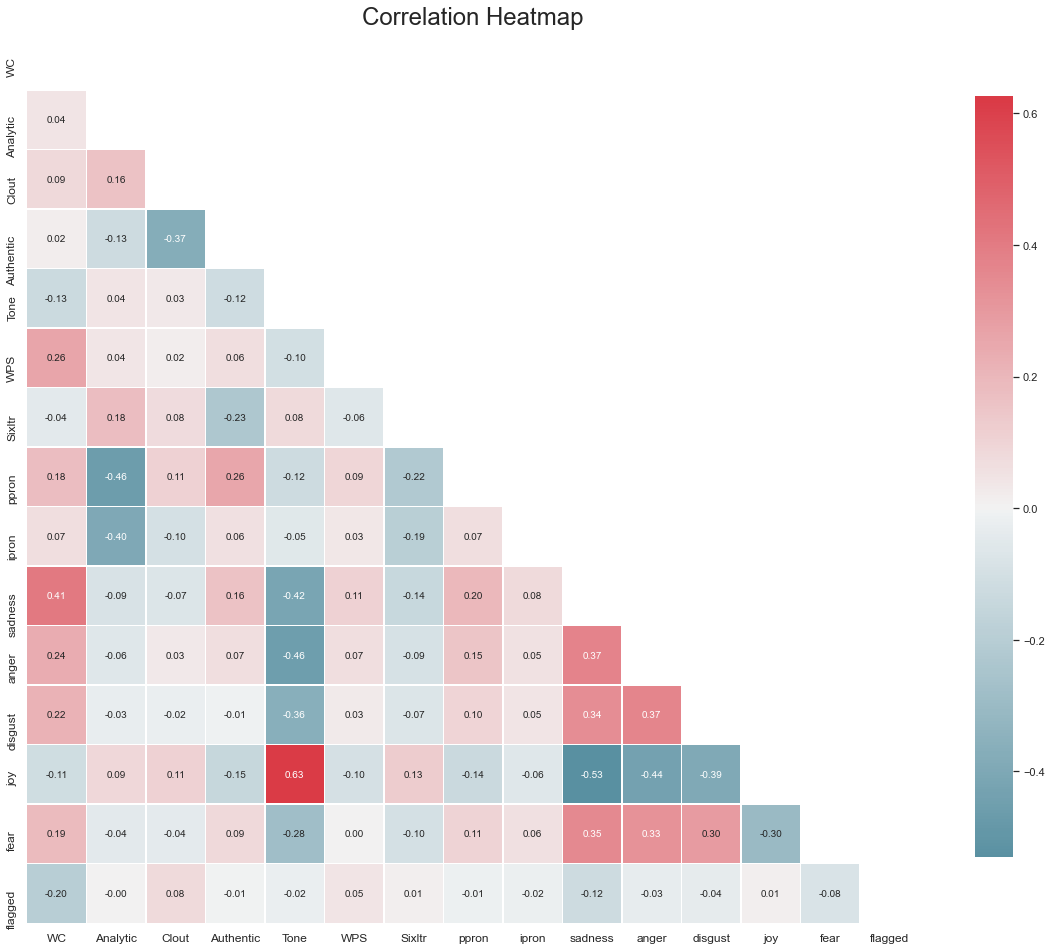

In [313]:
heatmap(df_reg_emotion)

In [317]:
from sklearn.metrics import accuracy_score

#from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state = 1, n_estimators=1000)
#X = feature_selection(X_train,Y_train, 150)

rf_model.fit(X_train, Y_train)
rf_predictions = rf_model.predict(X_test)
acc = accuracy_score(rf_predictions,Y_test)
acc

0.6375612745098039